## Королев Игорь Михайлович
Группа: М8О-308Б-19

Почта: ikorolew02@gmail.com

# Лабораторная работа №0

**Цель работы:** Выбрать набор данных. Поставить задачу, которую необходимо решить с помощью эти данных. Определить что нужно получить на выходе, как это измерять, посмотреть на сами данные. Определить являются ли данные грязными или чистыми. Есть ли у данных пропуски. Как зависят между собой признаки.

**Задача:** На наборе данных о сердечной недостаточности подготовить данные для решения бинарной классификации наличия сердечной недостаточности. С помощью датасета необходимо определять, есть ли у пациента сердечная недостаточноть.

### Установка датасета

**Датасет (обучающая выборка)** - набор примеров или объектов, который нам дан, чтобы обучить алгоритм.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Импортируем данные

In [2]:
data = pd.read_csv('heart.csv')

Посмотрим какую информацию содержит в себе импортированный набор данных.

In [3]:
print('Размеры датасета:', data.shape)

Размеры датасета: (918, 12)


In [4]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Датасет содержит 918 строк (количество наблюдений) и 11 признаков.

Выведем все признаки, содержащиеся в датасете.

In [5]:
print(data.columns.values)

['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope' 'HeartDisease']


* Age - возраст пациента;

* Sex - пол пациента;

* ChessPainType - тип боли в груди;

* ResingBP - артериальное давление в состоянии покоя;

* Cholesterol - холестерин;

* Fasting - уровен сахара в крови натощак;

* RestingECG - ЭКГ;

* MaxHR - максимальная достигнутая частота сердечных сокращений;

* ExerciseAngina - Физическая стенокардия;

* Oldpeak - дерпессия ST, вызванная физической нагрузкой;

* ST_Slope - наклон депрессии сегмента;

* HeartDisease - болезнь сердца.

Определим типы признаков

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [30]:
data[data.duplicated()]

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Chest_pain_ASY,Chest_pain_ATA,Chest_pain_NAP,Chest_pain_TA,Rest_ECG_LVH,Rest_ECG_Normal,Rest_ECG_ST,ST_slope_Down,ST_slope_Flat,ST_slope_Up


Из выведенной информации о датасете видно:

**7** признаков являются числовыми (1 - типа **float64**, 6 - типа **int64**);

**5** признаков имеют тип **object**.

Также из выведенной информации видно, что каждый столбец содержит 918 непустых наблюдения. Таким образом, все колонки таблицы полностью заполнены и выбросов нет.

Для некоторых столбцов необходимо изменить тип.

Категориальный признак - признак, значения которого показывают, к какой категории принадлежит объект.

Категориальные признаки датасета: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

Порядковые признаки: Age, 

Количественные признаки: Oldpeak

Посмотрим статистику по пустым значениям в таблице

In [7]:
dataset_missing_values_count = data.isnull().sum()
dataset_missing_values_count

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Можно увидеть, что все колонки таблицы полностью заполнены и выбросов нет. Т.е. набор данных содержит только непустые значения, поэтому нет необходимости обрабатывать отсутствующие значения.

In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
pd.__version__

'1.4.2'

In [10]:
data.describe(include=['O'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Выполнение преобразований для датасета

In [11]:
# Приведём значения признака Sex к числовому значению. Мужчина - 0, Женщина - 1
data['Sex'] = data['Sex'].map({'M' : 0, 'F' : 1}).astype(int)

In [12]:
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N' : 0, 'Y' : 1}).astype(int)

In [13]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

### OneHotEncoding

Преобразуем нечисловые признаки к числовому виду.

In [14]:
dummies = pd.get_dummies(data.ChestPainType)

In [15]:
dummies.head(5)

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [16]:
data = pd.concat([data, pd.get_dummies(data.ChestPainType, prefix='Chest_pain')], axis=1)
data.drop("ChestPainType", axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data.RestingECG, prefix='Rest_ECG')], axis=1)
data.drop("RestingECG", axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data.ST_Slope, prefix='ST_slope')], axis=1)
data.drop("ST_Slope", axis=1, inplace=True)

In [17]:
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Chest_pain_ASY,Chest_pain_ATA,Chest_pain_NAP,Chest_pain_TA,Rest_ECG_LVH,Rest_ECG_Normal,Rest_ECG_ST,ST_slope_Down,ST_slope_Flat,ST_slope_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,0,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,0,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,1,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              918 non-null    int64  
 1   Sex              918 non-null    int64  
 2   RestingBP        918 non-null    int64  
 3   Cholesterol      918 non-null    int64  
 4   FastingBS        918 non-null    int64  
 5   MaxHR            918 non-null    int64  
 6   ExerciseAngina   918 non-null    int64  
 7   Oldpeak          918 non-null    float64
 8   HeartDisease     918 non-null    int64  
 9   Chest_pain_ASY   918 non-null    uint8  
 10  Chest_pain_ATA   918 non-null    uint8  
 11  Chest_pain_NAP   918 non-null    uint8  
 12  Chest_pain_TA    918 non-null    uint8  
 13  Rest_ECG_LVH     918 non-null    uint8  
 14  Rest_ECG_Normal  918 non-null    uint8  
 15  Rest_ECG_ST      918 non-null    uint8  
 16  ST_slope_Down    918 non-null    uint8  
 17  ST_slope_Flat   

### Посмотрим на зависимости между данными

In [19]:
data.sort_values(by="Age").head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Chest_pain_ASY,Chest_pain_ATA,Chest_pain_NAP,Chest_pain_TA,Rest_ECG_LVH,Rest_ECG_Normal,Rest_ECG_ST,ST_slope_Down,ST_slope_Flat,ST_slope_Up
208,28,0,130,132,0,185,0,0.0,0,0,1,0,0,1,0,0,0,0,1
219,29,0,140,263,0,170,0,0.0,0,0,1,0,0,0,1,0,0,0,1
170,29,0,120,243,0,160,0,0.0,0,0,1,0,0,0,1,0,0,0,1
829,29,0,130,204,0,202,0,0.0,0,0,1,0,0,1,0,0,0,0,1
215,30,1,170,237,0,170,0,0.0,0,0,0,0,1,0,0,1,0,0,1
56,31,0,120,270,0,153,1,1.5,1,1,0,0,0,0,1,0,0,1,0
203,31,1,100,219,0,150,0,0.0,0,0,1,0,0,0,0,1,0,0,1
35,32,0,125,254,0,155,0,0.0,0,0,1,0,0,0,1,0,0,0,1
67,32,0,110,225,0,184,0,0.0,0,0,1,0,0,0,1,0,0,0,1
294,32,0,95,0,1,127,0,0.7,1,0,0,0,1,0,1,0,0,0,1


In [28]:
test = data.groupby('Age')['HeartDisease'].sum() / \
    (data.groupby('Age')['HeartDisease'].count() - data.groupby('Age')['HeartDisease'].sum())

<AxesSubplot:xlabel='Age'>

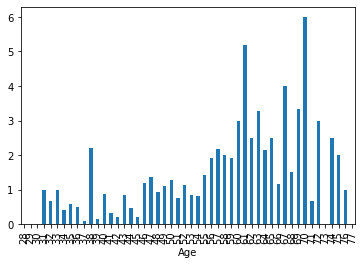

In [29]:
test.plot.bar()

<AxesSubplot:title={'center':'Матрица корелляции'}>

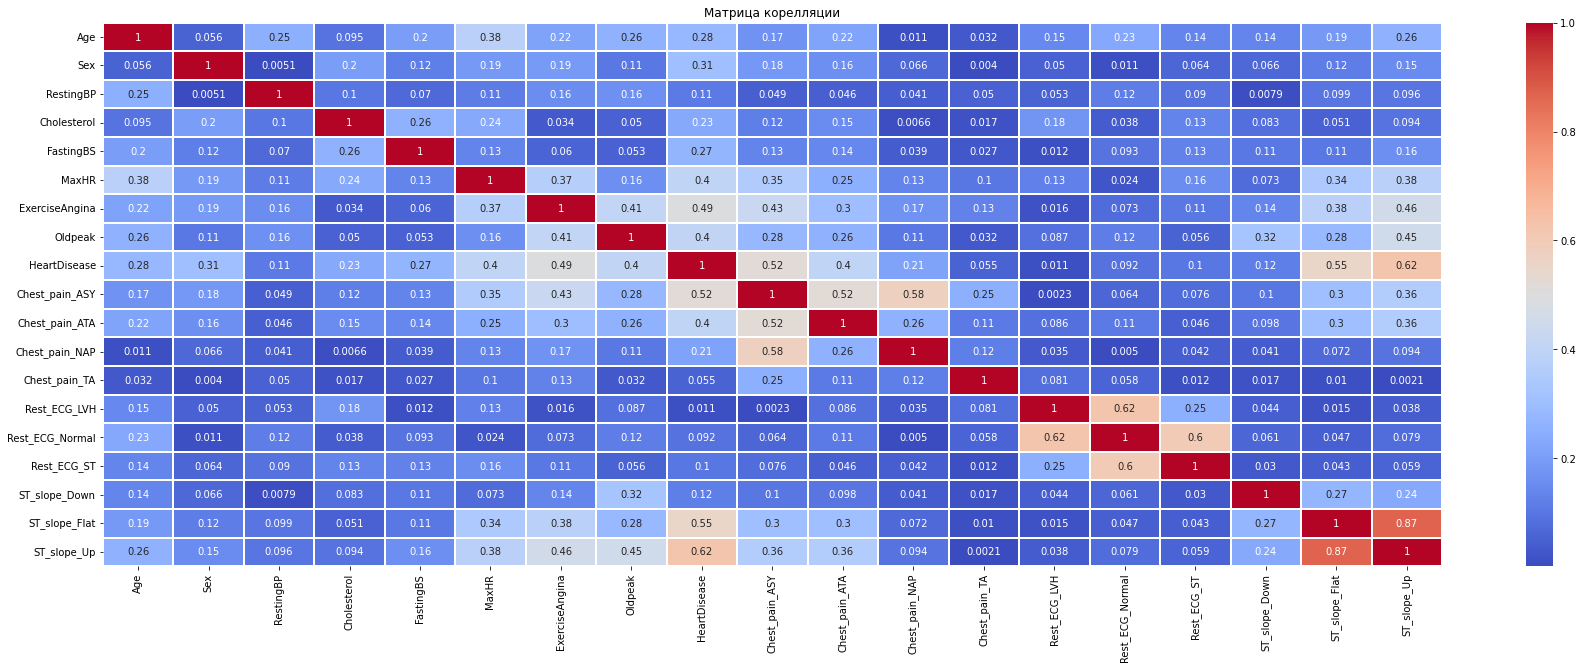

In [37]:
figure = plt.figure(figsize=(30, 10))
ax = figure.add_subplot()
ax.set_title('Матрица корелляции')

sns.heatmap(data.corr().abs(), annot=True, cmap="coolwarm", linewidth=0.1)